<a href="https://colab.research.google.com/github/MJMortensonWarwick/ADA2425/blob/main/5_3_tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTE - this tutorial is a (close) adapation from https://colab.research.google.com/drive/1Y4pAfAo2QX_lf7aS2rnHSbdLvinhQrqK

# t-SNE
Original paper:

L.J.P. van der Maaten and G.E. Hinton. **Visualizing High-Dimensional Data Using t-SNE.** Journal of Machine Learning Research 9(Nov):2579-2605, 2008. https://lvdmaaten.github.io/tsne/


Let's look at another dimensionality reduction technique called t-SNE (t-Distributed Stochastic Neighbor Embedding).


So what is t-SNE?

### PCA vs t-SNE

Unlike PCA which is a linear algorithm, t-SNE can work with non-linear data.

t-SNE attempts to preserve the original clustering of the high-dimensional space; It focuses on small distances / local similarities (as opposed to PCA's variance-maximizing approach)

Through an iterative process (gradient descent),

- points that are near in the original space attract;
- points that are far in the original space repel each other


https://www.youtube.com/watch?v=NEaUSP4YerM

https://colah.github.io/posts/2014-10-Visualizing-MNIST/

https://distill.pub/2016/misread-tsne/


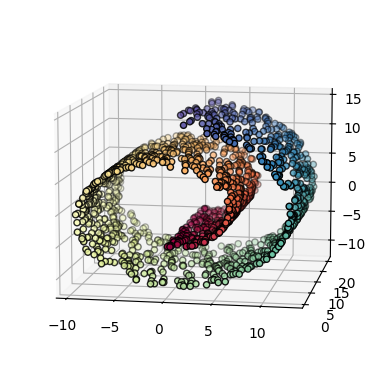

In [26]:
# Example modified from https://scikit-learn.org/stable/auto_examples/manifold/plot_swissroll.html
# and https://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

# create a swiss roll dataset and plot it
X, color = make_swiss_roll(n_samples=1500)

fig = plt.figure()
ax = fig.add_subplot(projection='3d') # Use this instead of p3.Axes3D
ax.view_init(10, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral, edgecolor='k')
plt.show()

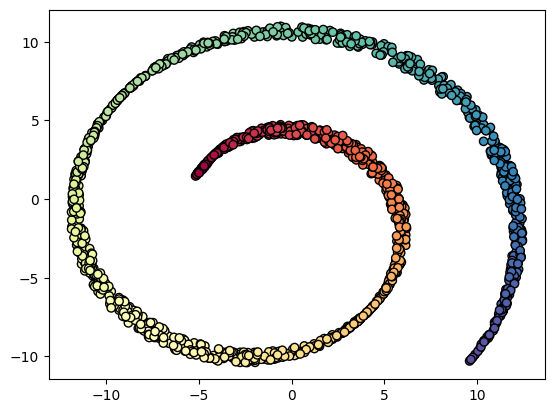

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral, edgecolor='k')
plt.show()

The above is an example where PCA is not really able to capture the non-linear shape and turn it into a lower-dimension form.

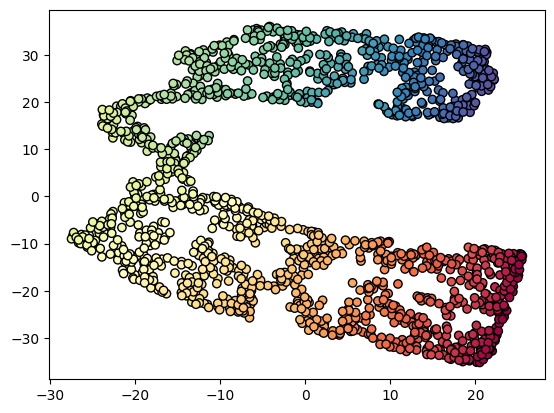

In [28]:
from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, perplexity=30)
tsne = TSNE(n_components=2, perplexity=50)
X_r = tsne.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral, edgecolor='k')
plt.show()

t-SNE, on the other hand, does a better job.

(For this specific shape of data, called the Swiss roll data, there are models that work better than t-SNE, such as [LLE](https://scikit-learn.org/stable/auto_examples/manifold/plot_swissroll.html) or [Isomap](https://scikit-learn.org/stable/modules/manifold.html#isomap). But t-SNE becomes powerful in really high-dimensional data!)

In [25]:
# case in point: MNIST digits
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets
from sklearn import datasets
digits = datasets.load_digits()

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [29]:
# digits.data.shape
digits.target

array([0, 1, 2, ..., 8, 9, 8])

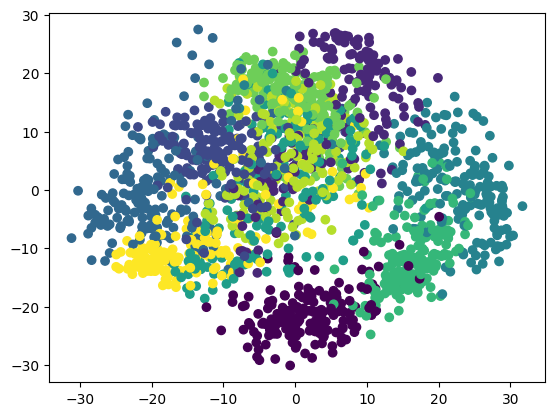

In [30]:
X = digits.data
y = digits.target

X_pca = PCA(n_components=2).fit_transform(X)
pca_x = X_pca[:,0]
pca_y = X_pca[:,1]

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(pca_x, pca_y, c=y)

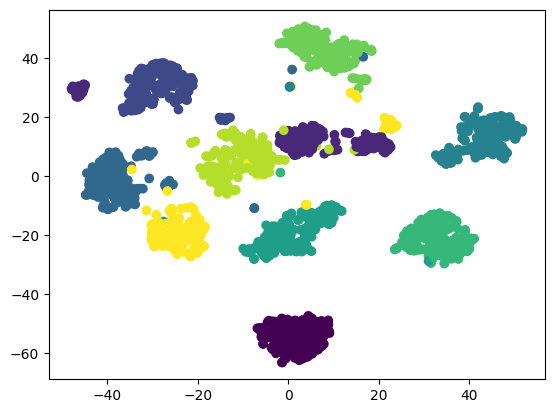

In [31]:
X_tsne = TSNE(n_components=2).fit_transform(X)
tsne_x = X_tsne[:,0]
tsne_y = X_tsne[:,1]

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(tsne_x, tsne_y, c=y)

We can also apply t-SNE to the word2vec embeddings to visualise which terms are similar.

__NO NEED TO WORRY ABOUT THIS CODE__

In [32]:
import requests
from bs4 import BeautifulSoup as bs

# We will use the text for Frankenstein by Mary Shelley (1818).
url = 'https://archive.org/stream/Frankenstein1818Edition/Frankenstein_djvu.txt'
r = requests.get(url)
html = bs(r.content)

text = html.select_one('div.container').text
# print(text[:1000])

In [33]:
# Do some basic text cleaning

# Discard table of contents
text = text[647:]

# join line-separated words
import re
text = re.sub(r'-[ \n]+', '', text)

# Clean chapter/volume numbers
text = re.sub(
    r'\n\n(chapter|letter|volume)[ a-z0-9]+\n\n',
    '\n',
    text,
    flags=re.IGNORECASE
)

# Four line breaks denote page changes; double line breaks are the 'real' ones.
# There is a chance some double- and quadruple-breaks might overlap, but I think it's okay to ignore them for this context
text = re.sub(r'\n{4}', '', text)

# Single line breaks are for formatting purposes only
text = re.sub(r'(?!\n{2,})\n', '', text)

# Remove non-alphabetic characters
text_processed = re.sub('[^a-zA-Z]', ' ', text.lower())

# Replace all whitespaces with a single space
text_processed = re.sub('\s+', ' ', text_processed)

In [34]:
# Here, we are using nltk to turn our text into a list of words and remove stopwords

import nltk

# Download the required data package
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing punkt_tab data

all_sentences = nltk.sent_tokenize(text_processed)
all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

# Removing Stop Words
from nltk.corpus import stopwords
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [35]:
from gensim.models import Word2Vec

model = Word2Vec(
    all_words,
    min_count=3,
    window=5,
    max_final_vocab=300
    )

In [36]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X = model.wv.vectors
terms = model.wv.index_to_key

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=10)
X_tsne = tsne.fit_transform(X_pca)

In [37]:
X = model.wv.vectors
terms = model.wv.index_to_key

tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X)

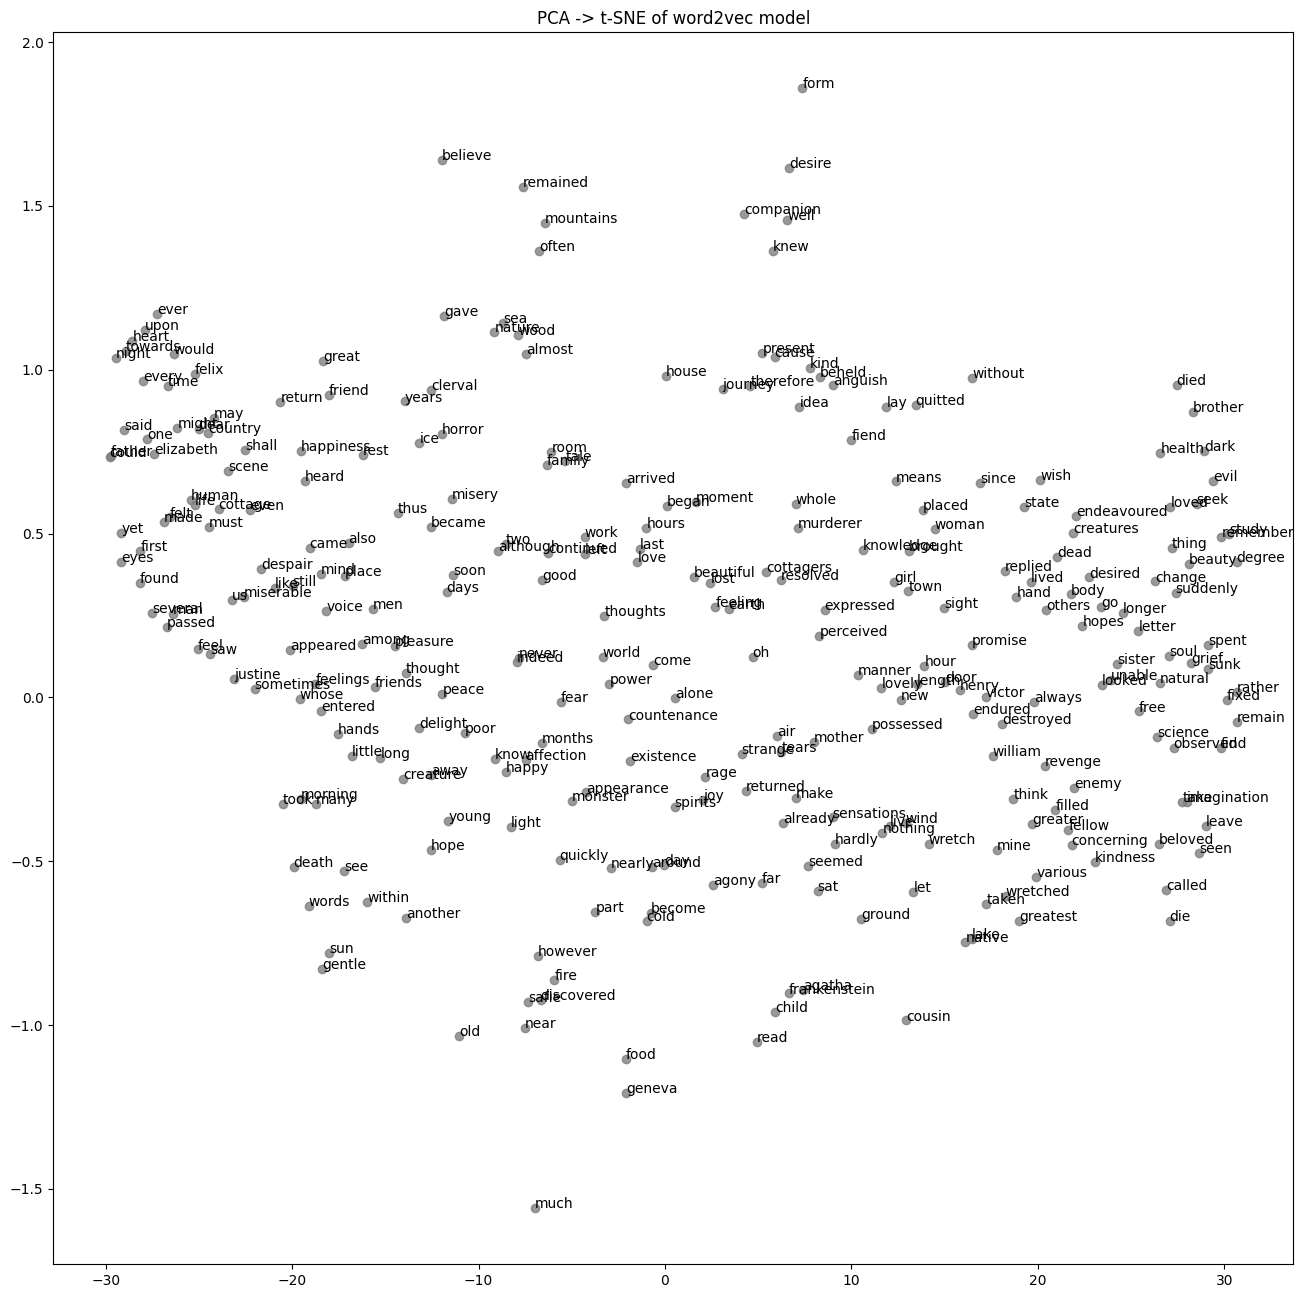

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(16,16)

for i, coord in enumerate(X_tsne):
    plt.scatter(coord[0], coord[1], alpha=.8, c='gray')
    ax.annotate(terms[i], (coord[0], coord[1]))
plt.title('PCA -> t-SNE of word2vec model')

plt.show()

## GPU-accelerated implementation of t-SNE

t-SNE can be quite slow as the data becomes bigger. Several implementations exist that give better performance than scikit-learn; tsne-cuda is the fastest python-based implementation as far as I know. Below is a link to an example notebook that shows you how to use it in Colab.

https://github.com/CannyLab/tsne-cuda

https://colab.research.google.com/drive/11YFkI_XA9DUE2lEnmGu08LZB7dv5-mbb

## See also:

http://projector.tensorflow.org/